# POS Analysis

## Table of Contents
- [1st Section](#Loading-in-the-data) is where I import the files
- [2nd section](#POS-tagging) is where I run the POS tagger
- [3rd section](#POS-extraction) is where I extract and count the POS for analysis
- [4th section](#POS-analysis) is where I analyze POS usage
- [Conclusion](#Conclusion) summarizes the notebook

## Loading in the data

In [1]:
# load in the libraries
import spacy
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scipy import stats

In [2]:
f = open('../analysis_notebooks/discourse_df.pkl', 'rb')
discourse_df = pickle.load(f)
f.close()

## POS tagging

In [3]:
# generate nlp object for spacy pos tagging
nlp = spacy.load("en_core_web_sm")

In [4]:
# function that tags POS and returns the POS in a list
def pos_tag(x):
    pos = []
    for y in nlp(x):
        pos_tag = (y.pos_)
        pos.append(pos_tag)
    return pos

In [5]:
# adding POS tags to see if any trends arise
discourse_df['pos_tag'] = discourse_df.utterance.map(lambda x: pos_tag(x))

In [6]:
discourse_df.head()

,conversation_ID,line_ID,character_ID,character_name,gender,movie_ID,movie_title,genres,movie_year,movie_decade,utterance,sents,tokens,sent_count,token_count,avg_sent_length,pos_tag
0,24,L1045,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,They do not!,[They do not!],"[They, do, not, !]",1,4,4.000000,"[PRON, VERB, PART, PUNCT]"
1,23,L985,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,I hope so.,[I hope so.],"[I, hope, so, .]",1,4,4.000000,"[PRON, VERB, ADV, PUNCT]"
2,22,L925,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,Let's go.,[Let's go.],"[Let, 's, go, .]",1,4,4.000000,"[VERB, PRON, VERB, PUNCT]"
3,21,L872,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,Okay -- you're gonna need to learn how to lie.,[Okay -- you're gonna need to learn how to lie.],"[Okay, --, you, 're, gon, na, need, to, learn,...",1,13,13.000000,"[INTJ, PUNCT, PRON, AUX, VERB, PART, VERB, PAR..."
4,21,L870,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,I'm kidding. You know how sometimes you just ...,"[I'm kidding., You know how sometimes you just...","[I, 'm, kidding, ., You, know, how, sometimes,...",3,25,8.333333,"[PRON, AUX, VERB, PUNCT, SPACE, PRON, VERB, SC..."


## POS extraction

I will ignore noun and verbs, as they are the most basic elements of phrase structure. I will look at adjectives and adverbs to see how often the speaker modifies other parts of speech, interjections to check for interruptions, and conjunctions to get an idea about sentence complexity.

The parts of speech I will look at are the following:
* ADV (adverb)
* ADJ (adjective)
* CONJ (conjunction)
* INTJ (interjection)

In [7]:
# adverbs
def get_adv(x):
    pattern = r'ADV'
    advs = re.findall(pattern, ' '.join(str(y) for y in x))
    return advs

# adding data to the data frames
discourse_df['adv_count'] = discourse_df.pos_tag.apply(get_adv).str.len()

In [8]:
# adjectives
def get_adj(x):
    pattern = r'ADJ'
    adjs = re.findall(pattern, ' '.join(str(y) for y in x))
    return adjs

# adding data to the data frames
discourse_df['adj_count'] = discourse_df.pos_tag.apply(get_adj).str.len()

In [9]:
# conjunctions
def get_conj(x):
    pattern = r'CONJ'
    conjs = re.findall(pattern, ' '.join(str(y) for y in x))
    return conjs

# adding data to the data frames
discourse_df['conj_count'] = discourse_df.pos_tag.apply(get_conj).str.len()

In [10]:
# interjections
def get_intj(x):
    pattern = r'INTJ'
    intjs = re.findall(pattern, ' '.join(str(y) for y in x))
    return intjs

# adding data to the data frames
discourse_df['intj_count'] = discourse_df.pos_tag.apply(get_intj).str.len()

In [11]:
# make sure that all columns got added properly
discourse_df.head()

,conversation_ID,line_ID,character_ID,character_name,gender,movie_ID,movie_title,genres,movie_year,movie_decade,...,sents,tokens,sent_count,token_count,avg_sent_length,pos_tag,adv_count,adj_count,conj_count,intj_count
0,24,L1045,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,...,[They do not!],"[They, do, not, !]",1,4,4.000000,"[PRON, VERB, PART, PUNCT]",0,0,0,0
1,23,L985,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,...,[I hope so.],"[I, hope, so, .]",1,4,4.000000,"[PRON, VERB, ADV, PUNCT]",1,0,0,0
2,22,L925,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,...,[Let's go.],"[Let, 's, go, .]",1,4,4.000000,"[VERB, PRON, VERB, PUNCT]",0,0,0,0
3,21,L872,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,...,[Okay -- you're gonna need to learn how to lie.],"[Okay, --, you, 're, gon, na, need, to, learn,...",1,13,13.000000,"[INTJ, PUNCT, PRON, AUX, VERB, PART, VERB, PAR...",0,0,1,1
4,21,L870,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,...,"[I'm kidding., You know how sometimes you just...","[I, 'm, kidding, ., You, know, how, sometimes,...",3,25,8.333333,"[PRON, AUX, VERB, PUNCT, SPACE, PRON, VERB, SC...",2,0,3,0


In [12]:
print('There are',discourse_df.adv_count.sum(),'adverbs in the corpus.')
print('There are',discourse_df.adj_count.sum(),'adjectives in the corpus.')
print('There are',discourse_df.conj_count.sum(),'conjunctions in the corpus.')
print('There are',discourse_df.intj_count.sum(),'interjections in the corpus.')

There are 196617 adverbs in the corpus.
There are 165924 adjectives in the corpus.
There are 144524 conjunctions in the corpus.
There are 66580 interjections in the corpus.


Adverbs are by far the most common POS out of the four selected for analysis.

## POS analysis

Let's see how each gender uses these different parts of speech. Because the parts of speech I am analyzing are not required, the usages may be low and a min of 0 per turn can be expected. This can be seen by flashing the head of the data frame above.

### Adverbs

In [13]:
discourse_df.groupby('gender').agg({'adv_count': ['sum', 'mean', 'max', 'std']})

adv_count                        
              sum      mean max       std
gender                                   
A            5576  0.612545  28  1.092334
F           53868  0.650973  26  1.130979
M          121185  0.644296  29  1.121424
unknown     15988  0.653612  28  1.128716

Characters with unknown gender have the highest mean of adverb usage but female characters are not far behind. However, the highest number of adverbs in one turn is from a male character with 29. Adverbs are the most used out of the four parts of speech selected for analysis and they are used very similarly across all gender markers. All max adverbs per turn are close together and based on the standard deviation the distribution is similar for all genders.

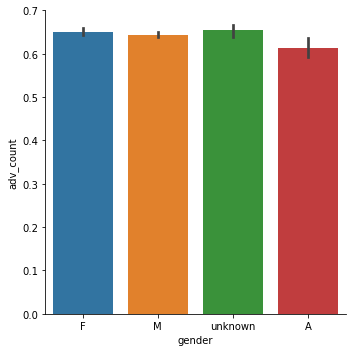

In [14]:
sns.catplot(data=discourse_df, x='gender', y='adv_count', kind='bar')
plt.savefig('../data_visualization/adv_usage.png')
plt.show()

In [15]:
# is there a statistically significant difference between this variance?
stats.f_oneway(discourse_df[discourse_df.gender=='F'].adv_count, discourse_df[discourse_df.gender=='M'].adv_count, discourse_df[discourse_df.gender=='unknown'].adv_count, discourse_df[discourse_df.gender=='A'].adv_count)

F_onewayResult(statistic=3.746982752713289, pvalue=0.010492754023321898)

This variation is significant at p ≤ 0.05. Even though the mean usage is small the difference between these groups is significant. While the difference is significant this is the highest p value for all parts of speech usage.

### Adjectives

In [16]:
discourse_df.groupby('gender').agg({'adj_count': ['sum', 'mean', 'max', 'std']})

adj_count                        
              sum      mean max       std
gender                                   
A            4894  0.537625  13  0.952213
F           43332  0.523650  21  0.951768
M          102787  0.546481  56  1.005318
unknown     14911  0.609583  18  1.054436

Characters with unknown gender have the highest mean usage of adjectives, they also have the largest standard deviation, so there is most variability in these character's usage. Again, the most adjectives in a turn is from a male character with 56. Female characters actually use the least adjectives on average and they have the narrowest distribution.

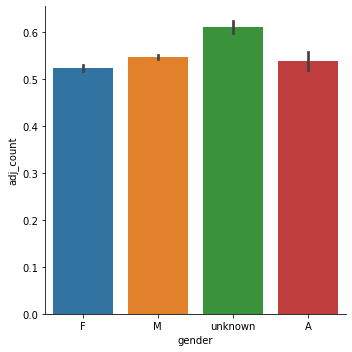

In [17]:
sns.catplot(data=discourse_df, x='gender', y='adj_count', kind='bar')
plt.savefig('../data_visualization/adj_usage.png')
plt.show()

In [18]:
# is there a statistically significant difference between this variance?
stats.f_oneway(discourse_df[discourse_df.gender=='F'].adj_count, discourse_df[discourse_df.gender=='M'].adj_count, discourse_df[discourse_df.gender=='unknown'].adj_count, discourse_df[discourse_df.gender=='A'].adj_count)

F_onewayResult(statistic=47.49179227626937, pvalue=1.1241629851045443e-30)

This variation is significant at p ≤ 0.05. Even though the mean usage is small the difference between these groups is significant.

### Conjunctions

In [19]:
discourse_df.groupby('gender').agg({'conj_count': ['sum', 'mean', 'max', 'std']})

conj_count                        
               sum      mean max       std
gender                                    
A             3923  0.430957  19  0.908852
F            38929  0.470441  26  0.977475
M            89792  0.477391  47  0.990067
unknown      11880  0.485671  27  0.946013

Unknown characters have the most conjunctions, but only by 0.01. Overall usage seems to be relatively consistent across the board. Once again, male characters have the highest number of conjunctions for one turn.

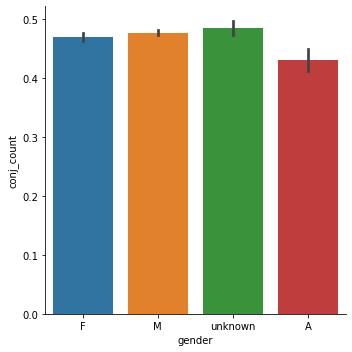

In [20]:
sns.catplot(data=discourse_df, x='gender', y='conj_count', kind='bar')
plt.savefig('../data_visualization/conj_usage.png')
plt.show()

In [21]:
# is there a statistically significant difference between this variance?
stats.f_oneway(discourse_df[discourse_df.gender=='F'].conj_count, discourse_df[discourse_df.gender=='M'].conj_count, discourse_df[discourse_df.gender=='unknown'].conj_count, discourse_df[discourse_df.gender=='A'].conj_count)

F_onewayResult(statistic=8.046723893935907, pvalue=2.3362344221333916e-05)

This variation is significant at p ≤ 0.05. Even though the mean usage is small the difference between these groups is significant.

### Interjections

In [22]:
discourse_df.groupby('gender').agg({'intj_count': ['sum', 'mean', 'max', 'std']})

intj_count                        
               sum      mean max       std
gender                                    
A             2035  0.223553  10  0.522833
F            18848  0.227770  12  0.536243
M            41181  0.218944  13  0.521081
unknown       4516  0.184620   6  0.471261

Very low usage across the board, with female being the higest at 0.227, but ambiguous characters are very close behind. Male characters have the most number of interjections in one turn with 13.

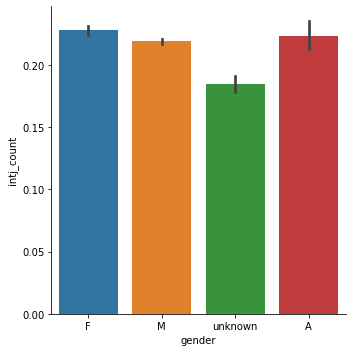

In [23]:
sns.catplot(data=discourse_df, x='gender', y='intj_count', kind='bar')
plt.savefig('../data_visualization/intj_usage.png')
plt.show()

In [24]:
# is there a statistically significant difference between this variance?
stats.f_oneway(discourse_df[discourse_df.gender=='F'].intj_count, discourse_df[discourse_df.gender=='M'].intj_count, discourse_df[discourse_df.gender=='unknown'].intj_count, discourse_df[discourse_df.gender=='A'].intj_count)

F_onewayResult(statistic=43.44043458032159, pvalue=4.675147442649785e-28)

This variation is significant at p ≤ 0.05. Even though the mean usage is small the difference between these groups is significant.

## Conclusion

Characters with unknown gender markers use the most adverbs, adjectives, and conjunctions. Adverb usage was the highest out of all parts of speech analzed here and had very similar rates of usage for all genders, however, group difference for all parts of speech were found to be significant at p ≤ 0.05. Therefore we can conclude that POS usage is a way that genders can be differentiated in the corpus.